In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sb
from pca import pca
import sklearn.preprocessing as skp

# 연습문제 1

## 정규화

In [2]:
Data=pd.read_excel('https://data.hossam.kr/E05/indian_diabetes.xlsx')
data=pd.DataFrame(Data)

In [3]:
y=data["Outcome"]
x=data[data.columns.difference(["Outcome"])]

## 데이터 확인

In [4]:
scale=skp.StandardScaler()
std_x=scale.fit_transform(x)

In [5]:
std_x=pd.DataFrame(data=std_x,columns=x.columns)

In [6]:
std_x.head(2)

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
0,1.425995,0.204013,0.149641,0.468492,0.848324,-0.692891,0.639947,0.907270
1,-0.190672,-0.684422,-0.160546,-0.365061,-1.123396,-0.692891,-0.844885,0.530902


## PCA검사

In [7]:
model=pca(n_components=len(std_x.columns))
A=model.fit_transform(std_x)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [8]:
ft=pd.DataFrame(A["topfeat"])[pd.DataFrame(A["topfeat"])["type"]=="best"]["feature"]

In [9]:
pre_std_x=std_x[ft]

## Logistic Regression

#### pre_x에 constant 추가

In [10]:
# 왜 안될까?
pre_std_x_add=sm.add_constant(pre_std_x)
pre_std_x_add

,const,BMI,Age,BloodPressure,DiabetesPedigreeFunction,SkinThickness,BMI,Age,SkinThickness
0,1.0,0.204013,1.425995,0.149641,0.468492,0.907270,0.204013,1.425995,0.907270
1,1.0,-0.684422,-0.190672,-0.160546,-0.365061,0.530902,-0.684422,-0.190672,0.530902
2,1.0,-1.103255,-0.105584,-0.263941,0.604397,-1.288212,-1.103255,-0.105584,-1.288212
3,1.0,-0.494043,-1.041549,-0.160546,-0.920763,0.154533,-0.494043,-1.041549,0.154533
4,1.0,1.409746,-0.020496,-1.504687,5.484909,0.907270,1.409746,-0.020496,0.907270
...,...,...,...,...,...,...,...,...,...
763,1.0,0.115169,2.532136,0.356432,-0.908682,1.722735,0.115169,2.532136,1.722735
764,1.0,0.610154,-0.531023,0.046245,-0.398282,0.405445,0.610154,-0.531023,0.405445
765,1.0,-0.735190,-0.275760,0.149641,-0.685193,0.154533,-0.735190,-0.275760,0.154533
766,1.0,-0.240205,1.170732,-0.470732,-0.371101,-1.288212,-0.240205,1.170732,-1.288212


In [11]:
pre_x_add=sm.add_constant(x)

In [12]:
model=sm.Logit(endog=y,exog=pre_x_add)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


In [13]:
result.pred_table()

array([[445.,  55.],
       [112., 156.]])

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        10:02:07   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
============================================================================================
"""

# 문제 2

In [15]:
D=pd.read_excel('https://data.hossam.kr/E05/titanic.xlsx')
data=pd.DataFrame(D)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 preprocessing

In [17]:
print(data["Cabin"].value_counts(),data["Cabin"].nunique())
print(data["Ticket"].value_counts())

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 147
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64


<Axes: xlabel='Age', ylabel='Count'>

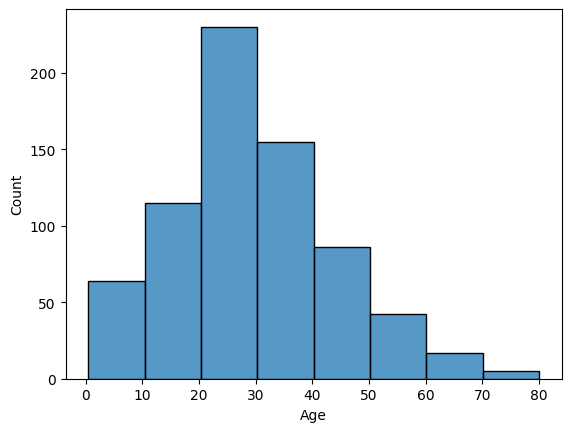

In [18]:
plt.figure()
sb.histplot(data["Age"],bins=8)

In [19]:
data["Age"].fillna(round(data["Age"].median()),inplace=True)

### Categorical Data

In [20]:
data=data.loc[data["Embarked"].dropna().index]

In [21]:
cols=[]
for x in data["Sex"].unique():
    for y in data["Embarked"].unique():
        cols.append([x,y])

In [22]:
mkdf=pd.DataFrame(index=data.index,columns=list(map(lambda x:f"{x[0]}:{x[1]}",cols)))

In [23]:
for i in data.index:
    for col in cols:
        if [data.loc[i,"Sex"],data.loc[i,"Embarked"]]==col:
            mkdf.loc[i,f"{col[0]}:{col[1]}"]=True

In [24]:
mkdf.fillna(False,inplace=True)

In [25]:
data=pd.merge(data,mkdf,left_index=True,right_index=True)

In [26]:
data.drop(columns=['Sex','Embarked'],axis=1,inplace=True)
data.drop("male:S",axis=1,inplace=True)

### 필요없는 데이터 삭제

In [27]:
data.drop(columns=["Ticket","Name","PassengerId"],inplace=True)
data.drop("Cabin",inplace=True,axis=1)

### Logistic Regression

In [28]:
y=data[["Survived"]]
x=data[data.columns.difference(["Survived"])]

In [29]:
x=sm.add_constant(x,has_constant="add")

In [35]:
x

,const,Age,Fare,Parch,Pclass,SibSp,female:C,female:Q,female:S,male:C,male:Q
0,1.0,22.0,7.2500,0,3,1,0,0,0,0,0
1,1.0,38.0,71.2833,0,1,1,1,0,0,0,0
2,1.0,26.0,7.9250,0,3,0,0,0,1,0,0
3,1.0,35.0,53.1000,0,1,1,0,0,1,0,0
4,1.0,35.0,8.0500,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,27.0,13.0000,0,2,0,0,0,0,0,0
887,1.0,19.0,30.0000,0,1,0,0,0,1,0,0
888,1.0,28.0,23.4500,2,3,1,0,0,1,0,0
889,1.0,26.0,30.0000,0,1,0,0,0,0,1,0


In [30]:
x[x.columns[-5:]]=x[x.columns[-5:]].astype("int")

In [31]:
model=sm.Logit(endog=y,exog=x)

In [32]:
fit=model.fit()

Optimization terminated successfully.
         Current function value: 0.440373
         Iterations 7


In [34]:
fit.pred_table()

array([[471.,  78.],
       [ 98., 242.]])